# Predict outcome for players in the fantasy football championhip week to use as new rankings for our players.

load data - will use 3 datasets:


1.   Players' scores each week so far this season
2.   Each team's defensive stats so far
3.   Each Player's matchups for the whole season



In [ ]:
import pandas as pd


In [ ]:
wrs = pd.read_csv('FantasyPros_Fantasy_Football_Points_WR_PPR.csv')

In [ ]:
wrs.head(20)

,#,Player,Pos,Team,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,AVG,TTL
0,1.0,Tyreek Hill,WR,MIA,44.5,15,30.7,10.2,32.1,28.3,...,30.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.5,254.9
1,2.0,Keenan Allen,WR,LAC,14.2,31.1,45.5,12.2,BYE,21.5,...,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.3,232.7
2,3.0,CeeDee Lamb,WR,DAL,11.7,25.3,10.2,14.8,8.9,18.7,...,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,214.7
3,4.0,Stefon Diggs,WR,BUF,26.2,13.6,19.1,36,24.1,20,...,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,208.5
4,5.0,A.J. Brown,WR,PHI,14.9,6.9,22.1,38.5,18.7,20.1,...,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.5,205.3
5,6.0,Amon-Ra St. Brown,WR,DET,19.1,14.2,19.6,16.6,-,30.4,...,21.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.3,192.1
6,7.0,Ja'Marr Chase,WR,CIN,9.1,8.1,26.1,14.3,52.2,14,...,9.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,189.7
7,8.0,DJ Moore,WR,CHI,4.5,16.4,13.1,27.1,49,10.1,...,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.5,182.0
8,9.0,Puka Nacua,WR,LAR,21.9,30.1,12.2,31.3,20.1,6.6,...,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.8,177.8
9,10.0,Adam Thielen,WR,CAR,3.2,20.4,31.5,15.2,27.7,28.5,...,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.5,175.2


replace BYE and DNPs with null values

In [ ]:
import numpy as np

columns_to_replace = wrs.columns[4:15]

for column in columns_to_replace:
    wrs[column] = wrs.apply(lambda row: np.nan if row[column] == 'BYE' else row[column], axis=1)



In [ ]:
columns_to_replace = wrs.columns[4:15]

for column in columns_to_replace:
    wrs[column] = wrs.apply(lambda row: np.nan if row[column] == '-' else row[column], axis=1)


wrs[columns_to_replace] = wrs[columns_to_replace].apply(pd.to_numeric, errors='coerce')

In [ ]:
print(wrs)

         #            Player  Pos Team     1     2     3     4     5     6  \
0      1.0       Tyreek Hill   WR  MIA  44.5  15.0  30.7  10.2  32.1  28.3   
1      2.0      Keenan Allen   WR  LAC  14.2  31.1  45.5  12.2   NaN  21.5   
2      3.0       CeeDee Lamb   WR  DAL  11.7  25.3  10.2  14.8   8.9  18.7   
3      4.0      Stefon Diggs   WR  BUF  26.2  13.6  19.1  36.0  24.1  20.0   
4      5.0        A.J. Brown   WR  PHI  14.9   6.9  22.1  38.5  18.7  20.1   
..     ...               ...  ...  ...   ...   ...   ...   ...   ...   ...   
226  227.0      Dee Eskridge   WR  SEA   NaN   NaN   NaN   NaN   NaN   NaN   
227  228.0   James Proche II   WR  CLE   NaN   NaN   NaN   NaN   NaN   NaN   
228  229.0  Gunner Olszewski   WR  NYG   NaN  -1.0   NaN   NaN  -2.0   NaN   
229    NaN               NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   
230    NaN               NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     ...    11  12  13  14  15  16  17  18   AVG    TTL  
0    

There 2 rows in the dataset with "Player" name as NaN

In [ ]:
wrs = wrs[wrs['Player'].notna()]



In [ ]:
print(wrs)

         #            Player Pos Team     1     2     3     4     5     6  \
0      1.0       Tyreek Hill  WR  MIA  44.5  15.0  30.7  10.2  32.1  28.3   
1      2.0      Keenan Allen  WR  LAC  14.2  31.1  45.5  12.2   NaN  21.5   
2      3.0       CeeDee Lamb  WR  DAL  11.7  25.3  10.2  14.8   8.9  18.7   
3      4.0      Stefon Diggs  WR  BUF  26.2  13.6  19.1  36.0  24.1  20.0   
4      5.0        A.J. Brown  WR  PHI  14.9   6.9  22.1  38.5  18.7  20.1   
..     ...               ...  ..  ...   ...   ...   ...   ...   ...   ...   
224  225.0      Trent Taylor  WR  CHI   0.0   0.0   NaN   0.0   0.0   0.0   
225  226.0  Richie James Jr.  WR   KC   1.6  -2.0   NaN   NaN   NaN   NaN   
226  227.0      Dee Eskridge  WR  SEA   NaN   NaN   NaN   NaN   NaN   NaN   
227  228.0   James Proche II  WR  CLE   NaN   NaN   NaN   NaN   NaN   NaN   
228  229.0  Gunner Olszewski  WR  NYG   NaN  -1.0   NaN   NaN  -2.0   NaN   

     ...    11  12  13  14  15  16  17  18   AVG    TTL  
0    ...  30.6 Na

## Defensive Stats

In [ ]:
defense = pd.read_csv('defense.csv', encoding='latin-1')

In [ ]:
defense.head(32)

,Team,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G
0,Cleveland,243.3,99.6,4.1,143.7,71.6,33,25.4,26:04:00,18.0
1,Baltimore,273.5,103.7,4.3,169.7,72.1,44,35.2,29:07:00,16.1
2,Dallas,276.3,109.1,4.1,167.2,77.7,37,34.3,28:20:00,16.8
3,Kansas City,283.2,112.4,4.5,170.8,83.1,36,35.7,28:30:00,16.4
4,San Francisco,295.3,82.0,4.0,213.3,77.1,33,39.9,28:11:00,15.5
5,Carolina,308.6,129.4,4.3,179.2,91.6,17,36.5,29:23:00,27.5
6,Atlanta,308.8,108.4,3.9,200.4,93.2,21,34.4,29:30:00,21.7
7,New Orleans,312.7,113.6,4.3,199.1,75.1,18,34.8,28:51:00,19.8
8,Buffalo,314.6,110.5,4.5,204.2,87.9,39,38.6,29:34:00,17.3
9,N.Y. Jets,316.3,137.6,4.2,178.7,79.4,26,39.6,32:38:00,20.4


## Use a third matchup dataset to link defensive stats to players

In [ ]:
wr_matchups = pd.read_csv('FantasyPros_Fantasy_Football_2023_WR_Matchups.csv')

In [ ]:
wr_matchups.head()

,ECR,Player,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,Tyreek HillT. Hill MIA,at LACThis is a 4 star matchup. WRs perform c...,at NEThis is a 3 star matchup. WRs perform cl...,vs. DENThis is a 4 star matchup. WRs perform ...,at BUFThis is a 4 star matchup. WRs perform b...,vs. NYGThis is a 3 star matchup. WRs perform ...,vs. CARThis is a 3 star matchup. WRs perform ...,at PHIThis is a 3 star matchup. WRs perform c...,vs. NEThis is a 3 star matchup. WRs perform c...,at KCThis is a 3 star matchup. WRs perform cl...,BYE,vs. LVThis is a 3 star matchup. WRs perform c...,at NYJThis is a 2 star matchup. WRs perform b...,at WASThis is a 5 star matchup. WRs perform b...,vs. TENThis is a 4 star matchup. WRs perform ...,vs. NYJThis is a 2 star matchup. WRs perform ...,vs. DALThis is a 2 star matchup. WRs perform ...,at BALThis is a 3 star matchup. WRs perform c...,vs. BUFThis is a 4 star matchup. WRs perform ...
1,2.0,A.J. BrownA.J. Brown PHI,at NEThis is a 3 star matchup. WRs perform cl...,vs. MINThis is a 3 star matchup. WRs perform ...,at TBThis is a 4 star matchup. WRs perform be...,vs. WASThis is a 5 star matchup. WRs perform ...,at LARThis is a 2 star matchup. WRs perform b...,at NYJThis is a 2 star matchup. WRs perform b...,vs. MIAThis is a 4 star matchup. WRs perform ...,at WASThis is a 5 star matchup. WRs perform b...,vs. DALThis is a 2 star matchup. WRs perform ...,BYE,at KCThis is a 3 star matchup. WRs perform cl...,vs. BUFThis is a 4 star matchup. WRs perform ...,vs. SFThis is a 3 star matchup. WRs perform c...,at DALThis is a 2 star matchup. WRs perform b...,at SEAThis is a 3 star matchup. WRs perform c...,vs. NYGThis is a 3 star matchup. WRs perform ...,vs. ARIThis is a 4 star matchup. WRs perform ...,at NYGThis is a 3 star matchup. WRs perform c...
2,3.0,CeeDee LambC. Lamb DAL,at NYGThis is a 3 star matchup. WRs perform c...,vs. NYJThis is a 2 star matchup. WRs perform ...,at ARIThis is a 4 star matchup. WRs perform b...,vs. NEThis is a 3 star matchup. WRs perform c...,at SFThis is a 3 star matchup. WRs perform cl...,at LACThis is a 4 star matchup. WRs perform c...,BYE,vs. LARThis is a 2 star matchup. WRs perform ...,at PHIThis is a 3 star matchup. WRs perform c...,vs. NYGThis is a 3 star matchup. WRs perform ...,at CARThis is a 3 star matchup. WRs perform c...,vs. WASThis is a 5 star matchup. WRs perform ...,vs. SEAThis is a 3 star matchup. WRs perform ...,vs. PHIThis is a 3 star matchup. WRs perform ...,at BUFThis is a 4 star matchup. WRs perform b...,at MIAThis is a 4 star matchup. WRs perform c...,vs. DETThis is a 4 star matchup. WRs perform ...,at WASThis is a 5 star matchup. WRs perform b...
3,4.0,Stefon DiggsS. Diggs BUF,at NYJThis is a 2 star matchup. WRs perform b...,vs. LVThis is a 3 star matchup. WRs perform c...,at WASThis is a 5 star matchup. WRs perform b...,vs. MIAThis is a 4 star matchup. WRs perform ...,vs. JACThis is a 3 star matchup. WRs perform ...,vs. NYGThis is a 3 star matchup. WRs perform ...,at NEThis is a 3 star matchup. WRs perform cl...,vs. TBThis is a 4 star matchup. WRs perform b...,at CINThis is a 2 star matchup. WRs perform b...,vs. DENThis is a 4 star matchup. WRs perform ...,vs. NYJThis is a 2 star matchup. WRs perform ...,at PHIThis is a 3 star matchup. WRs perform c...,BYE,at KCThis is a 3 star matchup. WRs perform cl...,vs. DALThis is a 2 star matchup. WRs perform ...,at LACThis is a 4 star matchup. WRs perform c...,vs. NEThis is a 3 star matchup. WRs perform c...,at MIAThis is a 4 star matchup. WRs perform c...
4,5.0,Amon-Ra St. BrownA. St. Brown DET,at KCThis is a 3 star matchup. WRs perform cl...,vs. SEAThis is a 3 star matchup. WRs perform ...,vs. ATLThis is a 3 star matchup. WRs perform ...,at GBThis is a 2 star matchup. WRs perform be...,vs. CARThis is a 3 star matchup. WRs perform ...,at TBThis is a 4 star matchup. WRs perform be...,at BALThis is a 3 star matchup. WRs perform c...,vs. LVThis is a 3 star matchup. WRs perform c...,BYE,at LACThis is a 4 star matchup. WRs per

clean this data - it is messy

In [ ]:
wr_matchups['Player1'] = wr_matchups['Player'].str[:-3].str.strip()
wr_matchups['Team'] = wr_matchups['Player'].str[-3:].str.strip()

wr_matchups = wr_matchups.drop(['Player'], axis=1)

In [ ]:
wr_matchups = wr_matchups[wr_matchups['Team'] != "FA"]

In [ ]:
import re

weeks_columns = [str(i) for i in range(1, 19)]

for week_column in weeks_columns:
    wr_matchups[week_column] = wr_matchups[week_column].str.extract(r'vs. (\w+)')
    wr_matchups[week_column] = wr_matchups[week_column].str.strip()



In [ ]:
wr_matchups.head()

,ECR,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,Player1,Team
0,1.0,LAC,NE,DEN,BUF,NYG,CAR,PHI,NE,KC,...,LV,NYJ,WAS,TEN,NYJ,DAL,BAL,BUF,Tyreek HillT. Hill,MIA
1,2.0,NE,MIN,TB,WAS,LAR,NYJ,MIA,WAS,DAL,...,KC,BUF,SF,DAL,SEA,NYG,ARI,NYG,A.J. BrownA.J. Brown,PHI
2,3.0,NYG,NYJ,ARI,NE,SF,LAC,NaN,LAR,PHI,...,CAR,WAS,SEA,PHI,BUF,MIA,DET,WAS,CeeDee LambC. Lamb,DAL
3,4.0,NYJ,LV,WAS,MIA,JAC,NYG,NE,TB,CIN,...,NYJ,PHI,NaN,KC,DAL,LAC,NE,MIA,Stefon DiggsS. Diggs,BUF
4,5.0,KC,SEA,ATL,GB,CAR,TB,BAL,LV,NaN,...,CHI,GB,NO,CHI,DEN,MIN,DAL,MIN,Amon-Ra St. BrownA. St. Brown,DET


In [ ]:
wr_matchups[wr_matchups.isna().any(axis=1)]

,ECR,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,Player1,Team
0,1.0,LAC,NE,DEN,BUF,NYG,CAR,PHI,NE,KC,...,LV,NYJ,WAS,TEN,NYJ,DAL,BAL,BUF,Tyreek HillT. Hill,MIA
1,2.0,NE,MIN,TB,WAS,LAR,NYJ,MIA,WAS,DAL,...,KC,BUF,SF,DAL,SEA,NYG,ARI,NYG,A.J. BrownA.J. Brown,PHI
2,3.0,NYG,NYJ,ARI,NE,SF,LAC,NaN,LAR,PHI,...,CAR,WAS,SEA,PHI,BUF,MIA,DET,WAS,CeeDee LambC. Lamb,DAL
3,4.0,NYJ,LV,WAS,MIA,JAC,NYG,NE,TB,CIN,...,NYJ,PHI,NaN,KC,DAL,LAC,NE,MIA,Stefon DiggsS. Diggs,BUF
4,5.0,KC,SEA,ATL,GB,CAR,TB,BAL,LV,NaN,...,CHI,GB,NO,CHI,DEN,MIN,DAL,MIN,Amon-Ra St. BrownA. St. Brown,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,193.0,TEN,CAR,GB,TB,NE,HOU,JAC,IND,CHI,...,NaN,ATL,DET,CAR,NYG,LAR,TB,ATL,Marquez CallawayM. Callaway,NO
194,195.0,NO,LAC,CLE,CIN,IND,BAL,NaN,ATL,PIT,...,JAC,CAR,IND,MIA,HOU,SEA,HOU,JAC,Shi SmithS. Smith,TEN
201,202.0,NE,MIN,TB,WAS,LAR,NYJ,MIA,WAS,DAL,...,KC,BUF,SF,DAL,SEA,NYG,ARI,NYG,Quez WatkinsQ. Watkins,PHI
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each week has NaN for the BYE week

There is no obvious pattern for trimming the player1 column since all player names are different and may have different punctuation. Instead, I will try fuzzy matching so that we can join the data.

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

#make sure that all values are strings and not null
wrs['Player'] = wrs['Player'].astype(str)
wr_matchups['Player1'] = wr_matchups['Player1'].astype(str)

wrs['Player_match'] = wrs['Player'].apply(lambda x: process.extractOne(x, wr_matchups['Player1'])[0] if pd.notnull(x) else '')




/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
(wrs['Player'].isna()).sum()

0

## Transform and Join

to join the defensive data to the wrs data, we need to put the data into long form using melt. each player should have one row per week.

In [ ]:
wrs_melted = pd.melt(wrs, id_vars=['Player', 'Pos', 'Team', 'AVG', 'TTL', 'Player_match'], var_name='Week', value_name='Pts')

In [ ]:
wrs_melted['Week'] = pd.to_numeric(wrs_melted['Week'], errors='coerce')

In [ ]:
wrs_melted = wrs_melted.dropna(subset=['Week'])

In [ ]:
wrs_melted = wrs_melted.sort_values(by=['Player', 'Week']).reset_index(drop=True)
print(wrs_melted)

          Player Pos Team   AVG    TTL          Player_match  Week   Pts
0     A.J. Brown  WR  PHI  20.5  205.3  A.J. BrownA.J. Brown   1.0  14.9
1     A.J. Brown  WR  PHI  20.5  205.3  A.J. BrownA.J. Brown   2.0   6.9
2     A.J. Brown  WR  PHI  20.5  205.3  A.J. BrownA.J. Brown   3.0  22.1
3     A.J. Brown  WR  PHI  20.5  205.3  A.J. BrownA.J. Brown   4.0  38.5
4     A.J. Brown  WR  PHI  20.5  205.3  A.J. BrownA.J. Brown   5.0  18.7
...          ...  ..  ...   ...    ...                   ...   ...   ...
4117   Zay Jones  WR  JAC   8.5   33.8     Zay JonesZ. Jones  14.0   NaN
4118   Zay Jones  WR  JAC   8.5   33.8     Zay JonesZ. Jones  15.0   NaN
4119   Zay Jones  WR  JAC   8.5   33.8     Zay JonesZ. Jones  16.0   NaN
4120   Zay Jones  WR  JAC   8.5   33.8     Zay JonesZ. Jones  17.0   NaN
4121   Zay Jones  WR  JAC   8.5   33.8     Zay JonesZ. Jones  18.0   NaN

[4122 rows x 8 columns]


In [ ]:
wrs_matchups_melted = pd.melt(wr_matchups, id_vars=['Player1', 'Team'], var_name='Week', value_name='OpponentTeam')


wrs_matchups_melted['Week'] = pd.to_numeric(wrs_matchups_melted['Week'], errors='coerce')

wrs_matchups_melted = wrs_matchups_melted.dropna(subset=['Week'])


wrs_matchups_melted = wrs_matchups_melted.sort_values(by=['Player1', 'Week']).reset_index(drop=True)

In [ ]:
wrs_matchups_melted.head()

,Player1,Team,Week,OpponentTeam
0,A.J. BrownA.J. Brown,PHI,1.0,NE
1,A.J. BrownA.J. Brown,PHI,2.0,MIN
2,A.J. BrownA.J. Brown,PHI,3.0,TB
3,A.J. BrownA.J. Brown,PHI,4.0,WAS
4,A.J. BrownA.J. Brown,PHI,5.0,LAR


In [ ]:
# Merge 'wrs_melted' with 'wrs_matchup_melted' to get the 'OpponentTeam' for each week
merged_data = pd.merge(wrs_melted, wrs_matchups_melted[['Player1', 'Week', 'OpponentTeam']], left_on=['Player_match', 'Week'], right_on=['Player1', 'Week'], how='left')


In [ ]:
merged_data.head()

,Player,Pos,Team,AVG,TTL,Player_match,Week,Pts,Player1,OpponentTeam
0,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,1.0,14.9,A.J. BrownA.J. Brown,NE
1,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,2.0,6.9,A.J. BrownA.J. Brown,MIN
2,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,3.0,22.1,A.J. BrownA.J. Brown,TB
3,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,4.0,38.5,A.J. BrownA.J. Brown,WAS
4,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,5.0,18.7,A.J. BrownA.J. Brown,LAR


Just need to add defensive stats. The defense dataset uses full city names, so we need to add a bridge for the team names.

In [ ]:

defense['bridge'] = defense['Team'].apply(lambda x: 'ARI' if 'Arizona' in x else
                                          'ATL' if 'Atlanta' in x else
                                          'BAL' if 'Baltimore' in x else
                                          'BUF' if 'Buffalo' in x else
                                          'CAR' if 'Carolina' in x else
                                          'CHI' if 'Chicago' in x else
                                          'CIN' if 'Cincinnati' in x else
                                          'CLE' if 'Cleveland' in x else
                                          'DAL' if 'Dallas' in x else
                                          'DEN' if 'Denver' in x else
                                          'DET' if 'Detroit' in x else
                                          'GB' if 'Green Bay' in x else
                                          'HOU' if 'Houston' in x else
                                          'IND' if 'Indianapolis' in x else
                                          'JAC' if 'Jacksonville' in x else
                                          'KC' if 'Kansas City' in x else
                                          'LV' if 'Las Vegas' in x else
                                          'LAC' if 'L.A. Chargers' in x else
                                          'LAR' if 'L.A. Rams' in x else
                                          'MIA' if 'Miami' in x else
                                          'MIN' if 'Minnesota' in x else
                                          'NE' if 'New England' in x else
                                          'NO' if 'New Orleans' in x else
                                          'NYG' if 'N.Y. Giants' in x else
                                          'NYJ' if 'N.Y. Jets' in x else
                                          'PHI' if 'Philadelphia' in x else
                                          'PIT' if 'Pittsburgh' in x else
                                          'SF' if 'San Francisco' in x else
                                          'SEA' if 'Seattle' in x else
                                          'TB' if 'Tampa Bay' in x else
                                          'TEN' if 'Tennessee' in x else
                                          'WAS' if 'Washington' in x else
                                          None)


print(defense)



              Team  Yards/G  Rush/G  Rush/P  Pass/G    QBR  Sacks  3rd%  \
0        Cleveland    243.3    99.6     4.1   143.7   71.6     33  25.4   
1        Baltimore    273.5   103.7     4.3   169.7   72.1     44  35.2   
2           Dallas    276.3   109.1     4.1   167.2   77.7     37  34.3   
3      Kansas City    283.2   112.4     4.5   170.8   83.1     36  35.7   
4    San Francisco    295.3    82.0     4.0   213.3   77.1     33  39.9   
5         Carolina    308.6   129.4     4.3   179.2   91.6     17  36.5   
6          Atlanta    308.8   108.4     3.9   200.4   93.2     21  34.4   
7      New Orleans    312.7   113.6     4.3   199.1   75.1     18  34.8   
8          Buffalo    314.6   110.5     4.5   204.2   87.9     39  38.6   
9        N.Y. Jets    316.3   137.6     4.2   178.7   79.4     26  39.6   
10         Detroit    318.8    91.3     3.9   227.5   92.5     23  36.2   
11           Miami    319.8    99.2     3.8   220.6   94.4     31  35.9   
12       Minnesota    320

In [ ]:
final_result = pd.merge(merged_data, defense, left_on=['OpponentTeam'], right_on=['bridge'], how='left')


In [ ]:
final_result.head()

,Player,Pos,Team_x,AVG,TTL,Player_match,Week,Pts,Player1,OpponentTeam,...,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G,bridge
0,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,1.0,14.9,A.J. BrownA.J. Brown,NE,...,326.5,97.7,3.4,228.8,90.1,18.0,39.6,32:42:00,23.8,NE
1,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,2.0,6.9,A.J. BrownA.J. Brown,MIN,...,320.6,94.0,3.7,226.6,92.3,29.0,41.4,30:09:00,20.9,MIN
2,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,3.0,22.1,A.J. BrownA.J. Brown,TB,...,360.7,90.0,3.7,270.7,97.1,29.0,46.7,30:44:00,20.0,TB
3,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,4.0,38.5,A.J. BrownA.J. Brown,WAS,...,377.7,113.1,4.4,264.6,104.0,35.0,39.5,28:48:00,29.2,WAS
4,A.J. Brown,WR,PHI,20.5,205.3,A.J. BrownA.J. Brown,5.0,18.7,A.J. BrownA.J. Brown,LAR,...,335.1,117.3,4.1,217.8,86.9,21.0,40.2,30:44:00,22.0,LAR


The final result has the players' outcome and the opposing team's defensive stats for each week as well as the players' average scores as a baseline. We should be able to use this data to predict for the players' performance in the fantasy football championship, taking into account the opposing defense. Next I will drop unnecessary columns and scale the data.

In [ ]:
final_result.columns

Index(['Player', 'Pos', 'Team_x', 'AVG', 'TTL', 'Player_match', 'Week', 'Pts',
       'Player1', 'OpponentTeam', 'Team_y', 'Yards/G', 'Rush/G', 'Rush/P',
       'Pass/G', 'QBR', 'Sacks', '3rd%', 'Poss/G', 'Pts/G', 'bridge'],
      dtype='object')

In [ ]:
final_result = final_result.drop(columns = ['Pos','bridge', 'Player_match', 'Player1', 'Team_y'])

In [ ]:
final_result = final_result.dropna(subset=['OpponentTeam'])

In [ ]:
historic = final_result[final_result['Week'] <= 11]

Drop weeks where players didn't play or had bye weeks by removing rows where points is NaN

In [ ]:
historic = historic[historic['Pts'].notna()]

In [ ]:
historic

,Player,Team_x,AVG,TTL,Week,Pts,OpponentTeam,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G
0,A.J. Brown,PHI,20.5,205.3,1.0,14.9,NE,326.5,97.7,3.4,228.8,90.1,18.0,39.6,32:42:00,23.8
1,A.J. Brown,PHI,20.5,205.3,2.0,6.9,MIN,320.6,94.0,3.7,226.6,92.3,29.0,41.4,30:09:00,20.9
2,A.J. Brown,PHI,20.5,205.3,3.0,22.1,TB,360.7,90.0,3.7,270.7,97.1,29.0,46.7,30:44:00,20.0
3,A.J. Brown,PHI,20.5,205.3,4.0,38.5,WAS,377.7,113.1,4.4,264.6,104.0,35.0,39.5,28:48:00,29.2
4,A.J. Brown,PHI,20.5,205.3,5.0,18.7,LAR,335.1,117.3,4.1,217.8,86.9,21.0,40.2,30:44:00,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,Zay Flowers,BAL,10.9,119.7,11.0,8.0,CIN,386.1,138.3,5.0,247.8,85.9,26.0,43.8,29:45:00,22.6
4212,Zay Jones,JAC,8.5,33.8,1.0,16.5,IND,358.5,129.7,4.1,228.8,82.2,30.0,38.4,32:08:00,24.8
4213,Zay Jones,JAC,8.5,33.8,2.0,0.0,KC,283.2,112.4,4.5,170.8,83.1,36.0,35.7,28:30:00,16.4
4216,Zay Jones,JAC,8.5,33.8,5.0,11.3,BUF,314.6,110.5,4.5,204.2,87.9,39.0,38.6,29:34:00,17.3


In [ ]:
ffplayoffs = final_result[final_result['Week'] > 14]

In [ ]:
ffplayoffs

,Player,Team_x,AVG,TTL,Week,Pts,OpponentTeam,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G
14,A.J. Brown,PHI,20.5,205.3,15.0,NaN,SEA,348.5,117.7,4.2,230.7,88.4,32.0,44.1,32:48:00,22.6
15,A.J. Brown,PHI,20.5,205.3,16.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30:05:00,25.9
16,A.J. Brown,PHI,20.5,205.3,17.0,NaN,ARI,349.5,132.1,4.2,217.5,99.2,32.0,46.8,31:58:00,25.8
17,A.J. Brown,PHI,20.5,205.3,18.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30:05:00,25.9
32,A.T. Perry,NO,3.9,11.8,15.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30:05:00,25.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,Zay Flowers,BAL,10.9,119.7,18.0,NaN,PIT,367.6,127.7,4.4,239.9,78.4,28.0,39.2,32:22:00,19.5
4226,Zay Jones,JAC,8.5,33.8,15.0,NaN,BAL,273.5,103.7,4.3,169.7,72.1,44.0,35.2,29:07:00,16.1
4227,Zay Jones,JAC,8.5,33.8,16.0,NaN,TB,360.7,90.0,3.7,270.7,97.1,29.0,46.7,30:44:00,20.0
4228,Zay Jones,JAC,8.5,33.8,17.0,NaN,CAR,308.6,129.4,4.3,179.2,91.6,17.0,36.5,29:23:00,27.5


Convert time of possession into minutes by simply taking the first two characters

In [ ]:
historic['Poss/G'] = historic['Poss/G'].str[:2].astype(int)

In [ ]:
ffplayoffs['Poss/G'] = ffplayoffs['Poss/G'].str[:2].astype(int)

<ipython-input-43-3702f9f4b4ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ffplayoffs['Poss/G'] = ffplayoffs['Poss/G'].str[:2].astype(int)


## Train a RandomForest model

Model will use all of the historic data as training data and predict the playoff scores. I will not scale the features, randomforest should not need scaled features as it does not split based on magnitude.

In [ ]:
X_train = historic.drop(['Pts','TTL', 'Player', 'Team_x', 'OpponentTeam'], axis=1)

In [ ]:
y_train = historic['Pts']

In [ ]:
X_test = ffplayoffs.drop(['Pts', 'TTL', 'Player', 'Team_x', 'OpponentTeam'], axis=1)

I am mostly not concerned with how the model performs on train or test data. Fantasy scoring is extremely variable and difficult to predict. What I hope to get from the random forest model is an order of rankings that takes into account the performance so far this season and the defenses that each player will face in the fantasy playoffs. I can then use these new rankings as a basis for a trade calculator if I want. For the purposes of this deliverable, I will still evaluate performance. However, I do not expect a high r-squared on any test data. For now, since the fantasy playoffs have not been played yet, we cannot evaluate our models performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print(model.score(X_train, y_train))

0.9206312498512715


The R-squared is actually good. This is surprising, given the amount of variability in fantasy scoring. I wonder if the model is overfitting.

## Visualize Performance

In [ ]:
old_preds = model.predict(X_train)

In [ ]:
old_results = pd.DataFrame({'PredictedPoints': old_preds}, index=X_train.index)

In [ ]:
historic_preds = historic.merge(old_results, left_index=True, right_index=True)

move predicted column towards front

In [ ]:
historic_preds.insert(5, 'PredictedPoints', historic_preds.pop('PredictedPoints'))

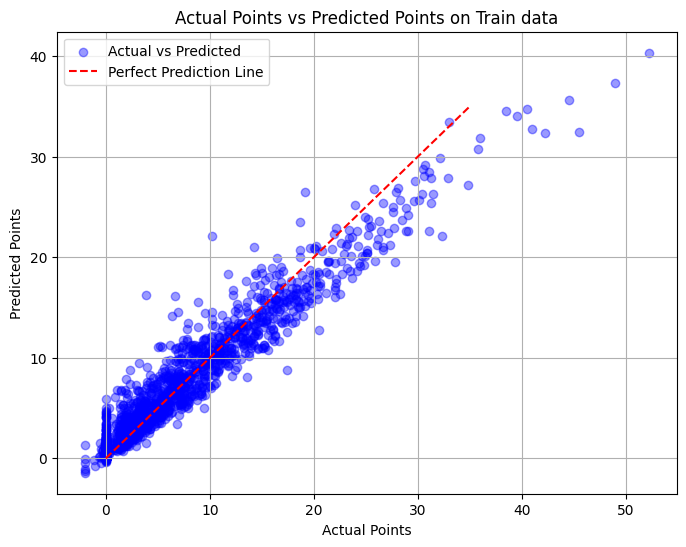

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(historic_preds['Pts'], historic_preds['PredictedPoints'], color='blue', alpha=0.4,label='Actual vs Predicted')
plt.plot([0, 35], [0, 35], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual Points vs Predicted Points on Train data')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()

It seems the the model uderpredicted higher scores. This makes because higher scores are higher than most players' average scores, which is a feature that I am sure the model used heavily. I am actually surprised that the model predicted any scores that were far from any player's average. I should try splitting the historic data into test and train to see if there is much overfitting.

## Train a new model using a train test split on historic data

In [ ]:
from sklearn.model_selection import train_test_split
historic_train_data, historic_test_data = train_test_split(historic, test_size=0.2, random_state=42)

In [ ]:
historic_train_X = historic_train_data.drop(['Pts','TTL', 'Player', 'Team_x', 'OpponentTeam'], axis=1)
historic_train_y = historic_train_data['Pts']
historic_test_X = historic_test_data.drop(['Pts','TTL', 'Player', 'Team_x', 'OpponentTeam'], axis=1)
historic_test_y = historic_test_data['Pts']

In [ ]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model2.fit(historic_train_X, historic_train_y)

RandomForestRegressor(random_state=42)

In [ ]:
print(model2.score(historic_train_X, historic_train_y))
print(model2.score(historic_test_X, historic_test_y))

0.9181592173700499
0.4894182581743909


Just as I thought. There is tremendous over fitting. Likely unnavoidable. This is ok though, we can still use the rankings for our trade calculator. Just for some context, lets plot it just as we did the first model.

In [ ]:
historic_test_X['preds'] = model.predict(historic_test_X)
historic_test_X['Pts'] = historic_test_y

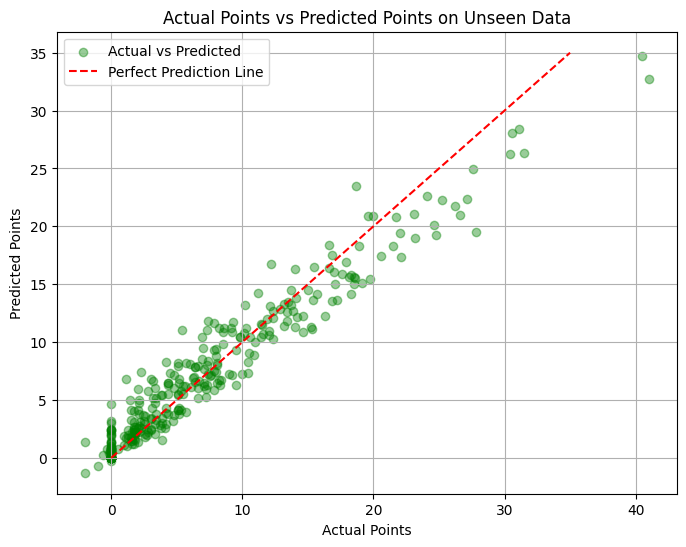

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(historic_test_X['Pts'], historic_test_X['preds'], color='green', alpha=0.4, label='Actual vs Predicted')
plt.plot([0, 35], [0, 35], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual Points vs Predicted Points on Unseen Data')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()

Not terrible, but definitely missing more on higher scores. Hard to predict games where players highly exceed their average. It is cool to see that the model did somewhat predict the highest scores though. Not sure how it did this, it may be that the defenses played in those games had by far the worst stats.

## Append predictions to existing data

In [ ]:
predictions = model.predict(X_test)

In [ ]:
results = pd.DataFrame({'PredictedPoints': predictions}, index=X_test.index)
results.head()

,PredictedPoints
14,20.041000
15,27.844000
16,31.903000
17,27.844000
32,4.846667


In [ ]:
playoff_preds = ffplayoffs.merge(results, left_index=True, right_index=True)

In [ ]:
playoff_preds.head(50)

,Player,Team_x,AVG,TTL,Week,Pts,OpponentTeam,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G,PredictedPoints
14,A.J. Brown,PHI,20.5,205.3,15.0,NaN,SEA,348.5,117.7,4.2,230.7,88.4,32.0,44.1,32,22.6,20.041000
15,A.J. Brown,PHI,20.5,205.3,16.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30,25.9,27.844000
16,A.J. Brown,PHI,20.5,205.3,17.0,NaN,ARI,349.5,132.1,4.2,217.5,99.2,32.0,46.8,31,25.8,31.903000
17,A.J. Brown,PHI,20.5,205.3,18.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30,25.9,27.844000
32,A.T. Perry,NO,3.9,11.8,15.0,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30,25.9,4.846667
33,A.T. Perry,NO,3.9,11.8,16.0,NaN,LAR,335.1,117.3,4.1,217.8,86.9,21.0,40.2,30,22.0,2.881000
34,A.T. Perry,NO,3.9,11.8,17.0,NaN,TB,360.7,90.0,3.7,270.7,97.1,29.0,46.7,30,20.0,3.904000
35,A.T. Perry,NO,3.9,11.8,18.0,NaN,ATL,308.8,108.4,3.9,200.4,93.2,21.0,34.4,29,21.7,3.386000
50,Adam Thielen,CAR,17.5,175.2,15.0,NaN,ATL,308.8,108.4,3.9,200.4,93.2,21.0,34.4,29,21.7,15.339000
51,Adam Thielen,CAR,17.5,175.2,16.0,NaN,GB,340.3,135.2,4.4,205.1,89.3,26.0,39.9,31,20.4,11.929000


In [ ]:
playoff_preds.insert(5, 'PredictedPoints', playoff_preds.pop('PredictedPoints'))

Now I have some simple projections for the fantasy playoffs. If I want to tone down the effects that the defense has on the outcome, I can change the scale of the yards/g columns. I can now use the average or pick a specific week, like the championship week, to base my new rankings on. As per deliverable #2, player rankings are more important in a trade calculator than projected points.

In [ ]:
chip = playoff_preds[playoff_preds['Week'] == 17]

In [ ]:
chip = chip.sort_values(by='PredictedPoints', ascending=False)
chip.reset_index(drop=True, inplace=True)

In [ ]:
chip.to_csv('chip_rankings.csv', index=False)

In [ ]:
chip.head(20)

,Player,Team_x,AVG,TTL,Week,PredictedPoints,Pts,OpponentTeam,Yards/G,Rush/G,Rush/P,Pass/G,QBR,Sacks,3rd%,Poss/G,Pts/G
0,Brandon Aiyuk,SF,16.7,150.1,17.0,33.557,NaN,WAS,377.7,113.1,4.4,264.6,104.0,35.0,39.5,28,29.2
1,A.J. Brown,PHI,20.5,205.3,17.0,31.903,NaN,ARI,349.5,132.1,4.2,217.5,99.2,32.0,46.8,31,25.8
2,CeeDee Lamb,DAL,21.5,214.7,17.0,31.091,NaN,DET,318.8,91.3,3.9,227.5,92.5,23.0,36.2,28,23.5
3,Keenan Allen,LAC,23.3,232.7,17.0,27.092,NaN,DEN,400.1,160.0,5.5,240.1,100.0,19.0,38.6,31,26.8
4,Justin Jefferson,MIN,21.8,109.1,17.0,23.225,NaN,GB,340.3,135.2,4.4,205.1,89.3,26.0,39.9,31,20.4
5,Puka Nacua,LAR,17.8,177.8,17.0,22.474,NaN,NYG,371.7,135.1,4.8,236.6,88.1,19.0,35.7,30,25.9
6,Tank Dell,HOU,16.4,147.8,17.0,22.234,NaN,TEN,343.1,112.3,3.9,230.8,100.7,25.0,40.0,31,21.4
7,Stefon Diggs,BUF,19.0,208.5,17.0,19.355,NaN,NE,326.5,97.7,3.4,228.8,90.1,18.0,39.6,32,23.8
8,Tyreek Hill,MIA,25.5,254.9,17.0,18.920,NaN,BAL,273.5,103.7,4.3,169.7,72.1,44.0,35.2,29,16.1
9,Davante Adams,LV,14.7,162.1,17.0,18.609,NaN,IND,358.5,129.7,4.1,228.8,82.2,30.0,38.4,32,24.8


I am pleased with the results. Interesting to see which players could potentially have big games in the championship round.

## What does the production curve look like?

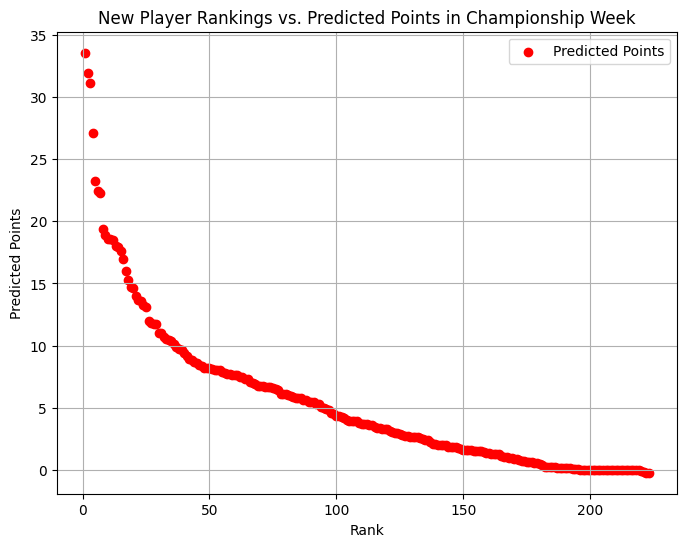

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(chip.index+1, chip['PredictedPoints'], color='red', label='Predicted Points')
plt.title('New Player Rankings vs. Predicted Points in Championship Week')
plt.xlabel('Rank')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()